# Employee Retention Analysis

### Objective: To predict employeee retention and understand its main drivers

### Summary of Findings:
#### Employee Churn
  * It seems that most people quit at one-year or two-year anniversary  
    * Even if people want to quit earlier, they seldom quit within one year
    * Employee usually need to stay for at least a year ot two to receive bonuses or stocks

  * There seems to be more employee quitting in Jan, May, Oct, and Nov.  
    * These month corresponds to the months in which more hiring activities are happening in the job market.
    * Quiting seems to particularly low in Feb and Dec. It makes sense that people want to wait until end of Dec to receive calendar year bonus
    
  * People with middle salaries and middle seniority are more likely to quit
    * People with middle salaries are the ones who are most eager to look for other opportunities for a potential raise.
    * People who are in the middle stage of their careers are more eager and active to look for a better opportunity
    
    
#### Other Factors and Variables
  * If we could get data on the salary of the next job of the employee who quit, that would help tremendously with the analysis. However this may not be easily obtainable
  * Raises and promotions received during the employee tenure

### Loading libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import textwrap
import sys

In [4]:
import jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme= 'monokai', context = 'notebook', ticks = True, grid = True)
%matplotlib inline

### Data Reading and Processing

In [5]:
employee = pd.read_csv('employee_retention_data.csv')

In [6]:
employee.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [11]:
employee.groupby('company_id')['join_date'].min()

company_id
1     2011-01-24
2     2011-01-24
3     2011-01-24
4     2011-01-24
5     2011-01-24
6     2011-01-24
7     2011-01-24
8     2011-01-24
9     2011-01-24
10    2011-01-31
11    2011-02-22
12    2011-03-14
Name: join_date, dtype: object

In [32]:
# Explore missing values
employee.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [36]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [41]:
employee['join_date'] = pd.to_datetime(employee['join_date'])
employee['quit_date'] = pd.to_datetime(employee['quit_date'])

### Create Table For Day and Employee Headcount

In [33]:
company = sorted(employee['company_id'].unique())

In [34]:
company

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [16]:
date = pd.date_range(start = '2011-01-24', end = '2015-12-13')

In [20]:
len(employee.index)

24702

In [21]:
len(date)

1785

In [46]:
# Loop through date and company id
day = []
employee_headcount = []
company_id = []

for c in company:
    for d in date:
        total_join = len(employee[(employee['join_date'] <= d) & employee['company_id'] == c])
        total_quit = len(employee[(employee['quit_date'] <= d) & employee['company_id'] == c])
        day.append(d)
        employee_headcount.append(total_join - total_quit)
        company_id.append(c)

In [47]:
# Create table for employee headcount

headcount = pd.DataFrame({'day': day, 'employee_headcount': employee_headcount, 'company_id' : company_id} 
                         ,columns = ['day', 'employee_headcount','company_id'])

In [48]:
headcount.head()

,day,employee_headcount,company_id
0,2011-01-24,43,1
1,2011-01-25,46,1
2,2011-01-26,51,1
3,2011-01-27,51,1
4,2011-01-28,51,1


### Employee Churn Analysis

#### Separate out people who quit and stayed and study them 

In [51]:
quit = employee[employee['quit_date'].notnull()]
stay = employee[employee['quit_date'].isnull()]

In [52]:
quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30


In [60]:
workdays = quit['quit_date'] - quit['join_date']

In [69]:
workdays = workdays.astype('timedelta64[D]')

In [66]:
workdays = np.array(workdays)

In [70]:
workdays

array([ 585,  340,  389, ...,  780, 1123,  864], dtype='timedelta64[D]')

Text(0, 0.5, 'Frequency')

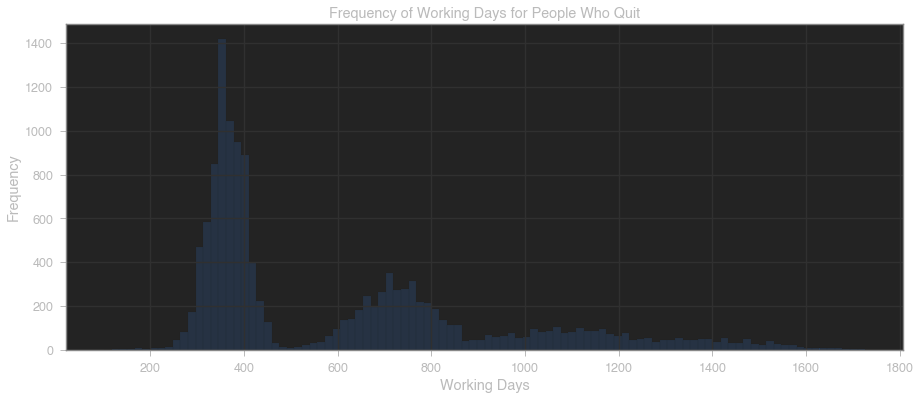

In [77]:
plt.figure(figsize = (15,6))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.distplot(workdays, bins = 100, hist_kws = hist_kws, kde = False)
plt.title('Frequency of Working Days for People Who Quit')
plt.xlabel('Working Days')
Findingsplt.ylabel('Frequency')

Findngs:
<br>
* It seems that most people quit at one-year or two-year anniversary

In [79]:
# Month of quitting 

quitmonth = quit['quit_date'].dt.month

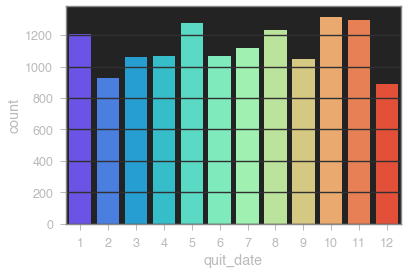

In [82]:
sns.countplot(quitmonth, palette = 'rainbow')

Findings:
<br>
* There seems to be more employee quitting in Jan, May, Oct, and Nov. 
* These month corresponds to the months in which more hiring activities are happening in the job market.
* Quiting seems to particularly low in Feb and Dec. It makes sense that people want to wait until end of Dec to receive calendar year bonus

### Random Forest Model

In [90]:
# Binary label for quit

employee['quit'] = 1
employee['quit'][employee['quit_date'].isnull()] = 0

<ipython-input-90-ab7a44ab00f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee['quit'][employee['quit_date'].isnull()] = 0


In [91]:
employee.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


In [92]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
 7   quit         24702 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


In [93]:
# Get dummies for categorical variables

cat_feats = ['dept', 'company_id']

In [94]:
final_data = pd.get_dummies(employee, columns = cat_feats, drop_first = True)

In [95]:
final_data.head()

,employee_id,seniority,salary,join_date,quit_date,quit,dept_data_science,dept_design,dept_engineer,dept_marketing,...,company_id_3,company_id_4,company_id_5,company_id_6,company_id_7,company_id_8,company_id_9,company_id_10,company_id_11,company_id_12
0,13021.0,28,89000.0,2014-03-24,2015-10-30,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,825355.0,20,183000.0,2013-04-29,2014-04-04,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,927315.0,14,101000.0,2014-10-13,NaT,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,662910.0,20,115000.0,2012-05-14,2013-06-07,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,256971.0,23,276000.0,2011-10-17,2014-08-22,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Train Test Split

from sklearn.model_selection import train_test_split

x = final_data.drop(['employee_id','join_date','quit_date','quit'], axis = 1)
y = final_data['quit']
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.3, random_state = 101)

In [97]:
# Train the random forest model

from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(n_estimators= 200)

In [99]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

### Prediction and evaluation


In [101]:

from sklearn.metrics import confusion_matrix, classification_report

In [102]:
# Evaluate prediction

rfc_pred = rfc.predict(x_test)

print('Confusion Matrix: \n')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Report: \n')
print(classification_report(y_test, rfc_pred))

Confusion Matrix: 

[[1460 1923]
 [1735 2293]]


Classification Report: 

              precision    recall  f1-score   support

           0       0.46      0.43      0.44      3383
           1       0.54      0.57      0.56      4028

    accuracy                           0.51      7411
   macro avg       0.50      0.50      0.50      7411
weighted avg       0.50      0.51      0.50      7411



In [106]:
features = list(x_train.columns)

In [108]:
# Explore what features are important in classification

importance = sorted(zip(features, rfc.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:20s} | {1:.5f}'.format(feature, val))

salary               | 0.67184
seniority            | 0.25556
company_id_2         | 0.00733
company_id_4         | 0.00664
company_id_3         | 0.00654
company_id_5         | 0.00593
company_id_7         | 0.00574
company_id_6         | 0.00567
company_id_9         | 0.00535
company_id_8         | 0.00521
company_id_10        | 0.00475
dept_marketing       | 0.00435
dept_sales           | 0.00419
dept_engineer        | 0.00348
dept_data_science    | 0.00328
dept_design          | 0.00322
company_id_12        | 0.00050
company_id_11        | 0.00044


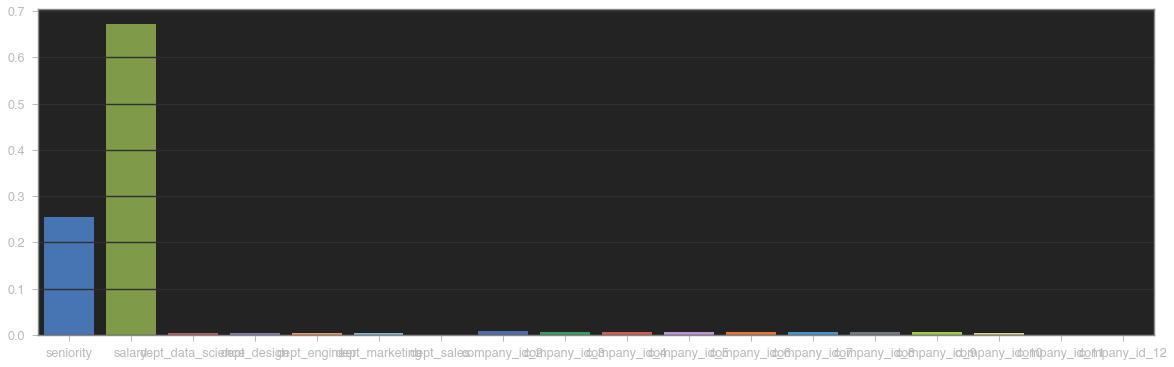

In [116]:
# Plot the feature importance
plt.figure(figsize = (20,6))
importances = list(rfc.feature_importances_)

sns.barplot(x = features, y = importances)

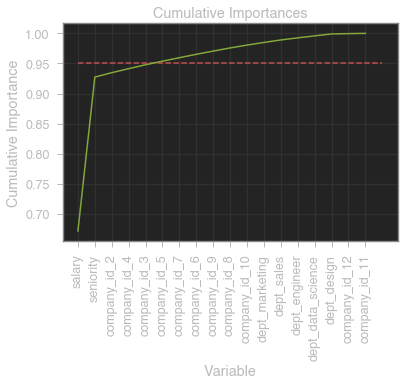

In [117]:
# Plot Cumulative Importance

# List of features sorted from most to least important
sorted_importances = [i[1] for i in importance]
sorted_features = [i[0] for i in importance]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

Findngs:
<br>
* It looks like salary is the most important feature, and seniority is the second most important feature in determining whether the employee quits

Text(0, 0.5, 'PDF')

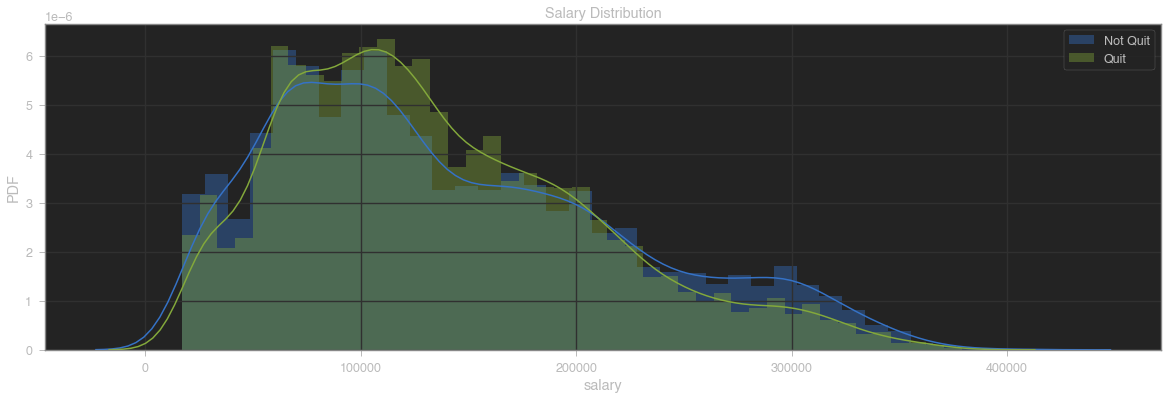

In [120]:
# Visualize  the distribution of salary for quit and stay employee

plt.figure(figsize = (20,6))

sns.distplot(employee[employee['quit'] == 0]['salary'], label = 'Not Quit')
sns.distplot(employee[employee['quit'] == 1]['salary'], label = 'Quit')
plt.legend()
plt.title('Salary Distribution')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

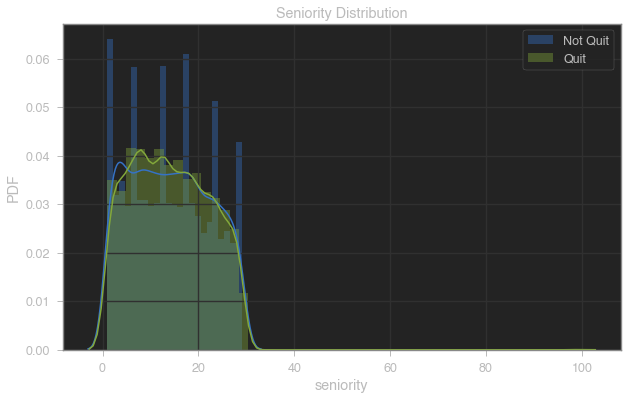

In [123]:
# Visualize  the distribution of seniority for quit and stay employee

plt.figure(figsize = (10,6))

sns.distplot(employee[employee['quit'] == 0]['seniority'], label = 'Not Quit')
sns.distplot(employee[employee['quit'] == 1]['seniority'], label = 'Quit')
plt.legend()
plt.title('Seniority Distribution')
plt.ylabel('PDF')

Findings:
<br>
Looking at the KDE line for both salary distribution and seniority distribution, we see:
<br>
* People with middle salaties are more likely to quit. This makes sense because people with middle salaries are the ones who are most eager to look for other opportunities for a potential raise.
* People with middle seniority are a lit bit more likely to quit. Again, this may be due to the fact that people who are in the middle stage of their careers are more eager and active to look for a better opportunity